In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
data_1 = pd.read_csv('hcmv-263hxkx-1qhtfgz.txt')

In [3]:
# from original data set, n = 296 (Palindromes), N = 229354 (Base pairs)
n, N = 296, 229354

In [4]:
# Generate three uniformed distributed 
samples = [pd.Series(np.random.uniform(0,N,n)).sort_values() for i in range(3)]

# Location & Spacing

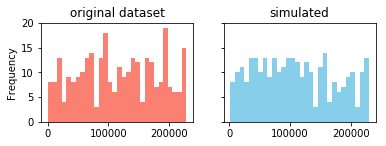

In [31]:
plt.subplot(221)
data_1['location'].plot(kind='hist',bins=30, ylim=(0,20), title = 'original dataset', sharex = True, sharey= True, color = 'salmon')
plt.subplot(222)
pd.Series(samples[0]).plot(kind='hist',bins=30, ylim=(0,20), title = 'simulated', sharex = True, sharey= True, color = 'skyblue')
#plt.subplot(223)
#pd.Series(samples[1]).plot(kind='hist',bins=30, ylim=(0,20), title = 'simulated 2', sharex = True, sharey= True, color = 'skyblue')
#plt.subplot(224)
#pd.Series(samples[2]).plot(kind='hist',bins=30, ylim=(0,20), title = 'simulated 3', sharex = True, sharey= True, color = 'skyblue')

In [68]:
orig_i30=pd.cut(data_1.location, bins = range(0, N, N//30)).value_counts()
sim_i30 = pd.cut(samples[0], bins = range(0, N, N//30)).value_counts()

In [69]:
res30 = pd.DataFrame({
    'orig': orig_i30,
    'sim': sim_i30
})

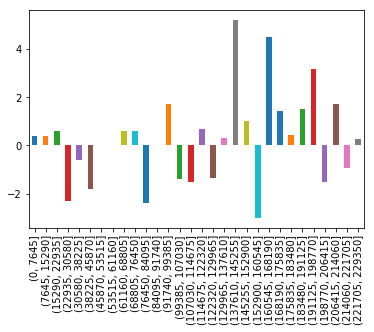

In [70]:
res30.apply(lambda x: (x.orig - x.sim)/x.sim**(0.5), axis = 1).plot(kind = 'bar')

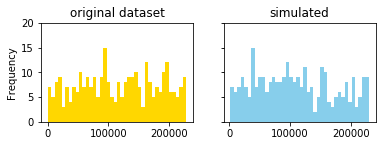

In [32]:
plt.subplot(221)
data_1['location'].plot(kind='hist',bins=40, ylim=(0,20), title = 'original dataset', sharex = True, sharey= True, color = 'gold')
plt.subplot(222)
pd.Series(samples[0]).plot(kind='hist',bins=40, ylim=(0,20), title = 'simulated', sharex = True, sharey= True, color = 'skyblue')
#plt.subplot(223)
#pd.Series(samples[1]).plot(kind='hist',bins=40, ylim=(0,20), title = 'simulated 2', sharex = True, sharey= True, color = 'skyblue')
#plt.subplot(224)
#pd.Series(samples[2]).plot(kind='hist',bins=40, ylim=(0,20), title = 'simulated 3', sharex = True, sharey= True, color = 'skyblue')

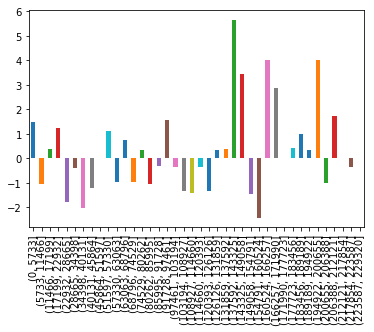

In [67]:
orig_i40=pd.cut(data_1.location, bins = range(0, N, N//40)).value_counts()
sim_i40 = pd.cut(samples[0], bins = range(0, N, N//40)).value_counts()
res40 = pd.DataFrame({
    'orig': orig_i40,
    'sim': sim_i40
})
res40.apply(lambda x: (x.orig - x.sim)/x.sim**(0.5), axis = 1).plot(kind = 'bar')

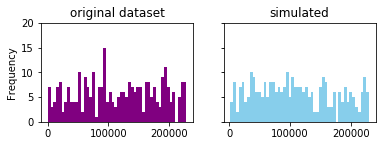

In [33]:
plt.subplot(221)
data_1['location'].plot(kind='hist',bins=50, ylim=(0,20), title = 'original dataset', sharex = True, sharey= True, color = 'purple')
plt.subplot(222)
pd.Series(samples[0]).plot(kind='hist',bins=50, ylim=(0,20), title = 'simulated', sharex = True, sharey= True, color = 'skyblue')
#plt.subplot(223)
#pd.Series(samples[1]).plot(kind='hist',bins=50, ylim=(0,20), title = 'simulated 2', sharex = True, sharey= True, color = 'skyblue')
#plt.subplot(224)
#pd.Series(samples[2]).plot(kind='hist',bins=50, ylim=(0,20), title = 'simulated 3', sharex = True, sharey= True, color = 'skyblue')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


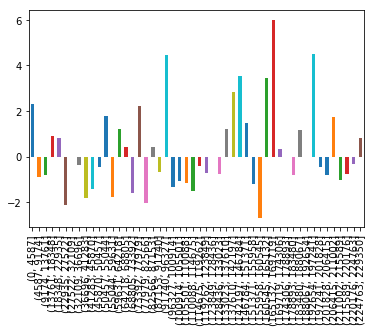

In [71]:
orig_i50=pd.cut(data_1.location, bins = range(0, N, N//50)).value_counts()
sim_i50 = pd.cut(samples[0], bins = range(0, N, N//50)).value_counts()
res50 = pd.DataFrame({
    'orig': orig_i50,
    'sim': sim_i50
})
res50.apply(lambda x: (x.orig - x.sim)/x.sim**(0.5), axis = 1).plot(kind = 'bar')

In [74]:
from scipy.stats import chisquare
print('with #interval = 30, performing chi-square test, p-val is: ')
print(chisquare(res30.orig, res30.sim))

with #interval = 30, performing chi-square test, p-val is: 
Power_divergenceResult(statistic=103.73113275613277, pvalue=2.4529718525712304e-10)


In [76]:

print('with #interval = 40, performing chi-square test, p-val is: ')
print(chisquare(res40.orig, res40.sim))

with #interval = 40, performing chi-square test, p-val is: 
Power_divergenceResult(statistic=125.00010822510822, pvalue=6.109891996538827e-11)


In [78]:
print('with #interval = 50, performing chi-square test, p-val is: ')
res50 = res50[res50['sim']!=0]
print(chisquare(res50.orig, res50.sim))

with #interval = 50, performing chi-square test, p-val is: 
Power_divergenceResult(statistic=175.77052669552668, pvalue=1.8154564078507857e-16)
